In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from tensorflow.keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [2]:
!unzip /content/images.zip


'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
#Get the first 5 rows of the training data
train.head()

,image_names,class
0,0001.jpg,1
1,0002.jpg,1
2,0003.jpg,1
3,0004.jpg,1
4,0005.jpg,1


In [5]:
#Get the first 5 rows of the test data
test.head()

,image_names
0,0001.jpg
1,0002.jpg
2,0003.jpg
3,0004.jpg
4,0005.jpg


In [6]:
#create a random number generator
seed = 42
rng = np.random.RandomState(seed)

In [7]:
#Distribution of classes in the dataset
train['class'].value_counts()

class
1    3150
0    1449
Name: count, dtype: int64

In [8]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in train.image_names:
    # loading the image using its name
    img = plt.imread('images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = train['class'].values
#y = train.class.values

In [9]:
#shape of the image
X.shape

(4599, 224, 224, 3)

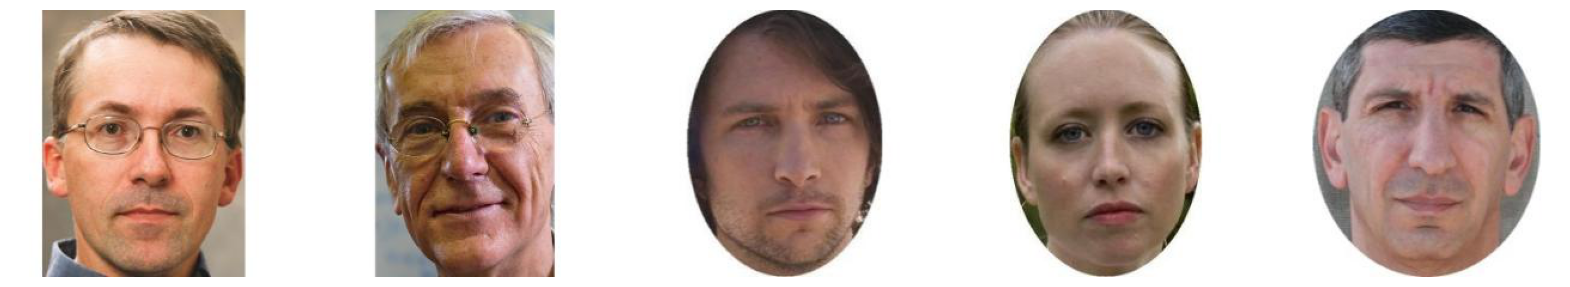

In [10]:
#visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
  ax[i].imshow(X[i*400])
  ax[i].axis('off')

In [12]:
import numpy as np

# Assume X is your original array
# Example: X = np.random.rand(4599, 218, 178, 3)

# Check the original shape of X
original_shape = X.shape
print("Original shape:", original_shape)

# Calculate the total size
total_size = np.prod(original_shape)
print("Total size of elements:", total_size)

# Desired shape
desired_shape = (4599, 218*178*3)
desired_size = np.prod(desired_shape)
print("Desired shape:", desired_shape)
print("Desired total size of elements:", desired_size)

# Verify if the sizes match
if total_size == desired_size:
    X = X.reshape(desired_shape)
    print("Reshape successful. New shape:", X.shape)
else:
    print("Mismatch in total size. Reshape not possible.")


Original shape: (4599, 224, 224, 3)
Total size of elements: 692278272
Desired shape: (4599, 116412)
Desired total size of elements: 535378788
Mismatch in total size. Reshape not possible.


In [13]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 218*178*3)
X.shape

ValueError: cannot reshape array of size 692278272 into shape (4599,116412)

In [ ]:
# minimum and maximum pixel values of images
X.min(), X.max()

In [ ]:
#minimum and maximum pixel values of images after normalizing
X.min(), X.max()

In [ ]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [ ]:
#SHAPE OF THE TRAINING AND VALIDATION SET
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

In [16]:
#defining the architecture of the model
model=Sequential()

model.add(InputLayer(input_shape=(218*178*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [17]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [22]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

SETTING UP EARLY STOPPING

In [18]:
# importing module for early stopping
from keras.callbacks import EarlyStopping

In [19]:
# setting up early stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, mode='min')

In [23]:
# training the model for 100 epochs

# defining the early stopping as callback using callbacks parameter of model.fit
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid), callbacks=[early_stopping])


Epoch 1/50
39/39 [==============================] - 18s 424ms/step - loss: 0.6871 - accuracy: 0.5669 - val_loss: 0.6722 - val_accuracy: 0.6005
Epoch 2/50
39/39 [==============================] - 16s 421ms/step - loss: 0.6826 - accuracy: 0.5731 - val_loss: 0.6721 - val_accuracy: 0.6005
Epoch 3/50
39/39 [==============================] - 16s 418ms/step - loss: 0.6827 - accuracy: 0.5731 - val_loss: 0.6715 - val_accuracy: 0.6005
Epoch 4/50
39/39 [==============================] - 15s 387ms/step - loss: 0.6821 - accuracy: 0.5731 - val_loss: 0.6712 - val_accuracy: 0.6005
Epoch 5/50
39/39 [==============================] - 16s 416ms/step - loss: 0.6826 - accuracy: 0.5731 - val_loss: 0.6709 - val_accuracy: 0.6005
Epoch 6/50
39/39 [==============================] - 15s 397ms/step - loss: 0.6821 - accuracy: 0.5765 - val_loss: 0.6730 - val_accuracy: 0.6005


In [24]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid,(model.predict(X_valid) > 0.5).astype("int32")[:, 0]), '%')

66/66 [==============================] - 4s 55ms/step
Accuracy on validation set: 0.6004761904761905 %


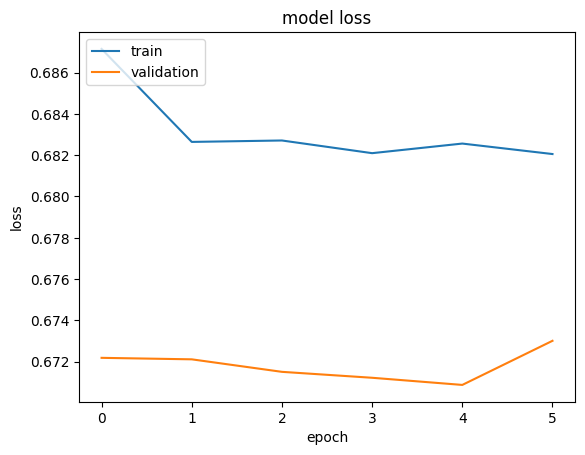

In [25]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

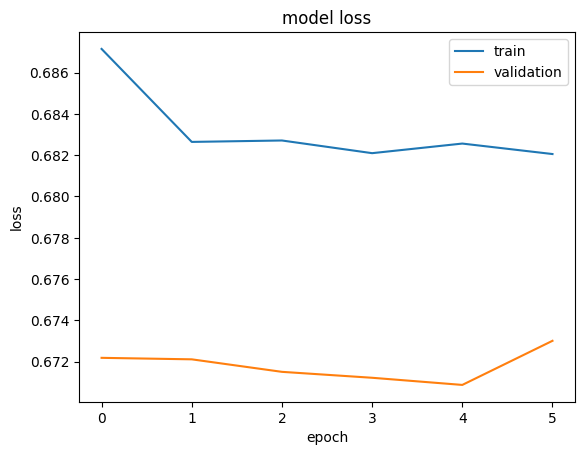

In [26]:
 # summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [27]:
# defining and compiling the model

# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(218*178*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])


In [28]:
# increasing the patience and threshold value
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, mode='min')

In [29]:
# training the model for 100 epochs
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid), callbacks=[early_stopping])

Epoch 1/100
39/39 [==============================] - 20s 485ms/step - loss: 0.6887 - accuracy: 0.5578 - val_loss: 0.6818 - val_accuracy: 0.6005
Epoch 2/100
39/39 [==============================] - 21s 533ms/step - loss: 0.6837 - accuracy: 0.5731 - val_loss: 0.6783 - val_accuracy: 0.6005
Epoch 3/100
39/39 [==============================] - 20s 508ms/step - loss: 0.6826 - accuracy: 0.5731 - val_loss: 0.6755 - val_accuracy: 0.6005
Epoch 4/100
39/39 [==============================] - 24s 615ms/step - loss: 0.6823 - accuracy: 0.5731 - val_loss: 0.6772 - val_accuracy: 0.6005
Epoch 5/100
39/39 [==============================] - 24s 620ms/step - loss: 0.6831 - accuracy: 0.5731 - val_loss: 0.6763 - val_accuracy: 0.6005
Epoch 6/100
39/39 [==============================] - 22s 555ms/step - loss: 0.6827 - accuracy: 0.5731 - val_loss: 0.6759 - val_accuracy: 0.6005
Epoch 7/100
39/39 [==============================] - 26s 660ms/step - loss: 0.6825 - accuracy: 0.5731 - val_loss: 0.6751 - val_accuracy:

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, (model.predict(X_valid) > 0.5).astype("int32")[:, 0]), '%')

66/66 [==============================] - 2s 29ms/step
Accuracy on validation set: 0.6004761904761905 %


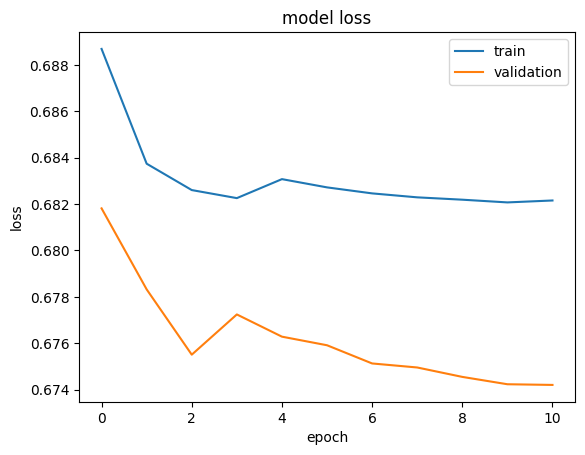

In [30]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [31]:
# importing the dropout layer
from keras.layers import Dropout

In [32]:
# defining the model architecture with dropout layer
model=Sequential()

model.add(InputLayer(input_shape=(218*178*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

In [33]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [34]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [35]:
# training the model for 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
39/39 [==============================] - 31s 779ms/step - loss: 0.7847 - accuracy: 0.4931 - val_loss: 0.6940 - val_accuracy: 0.4371
Epoch 2/100
39/39 [==============================] - 21s 551ms/step - loss: 0.7722 - accuracy: 0.5057 - val_loss: 0.6910 - val_accuracy: 0.6019
Epoch 3/100
39/39 [==============================] - 24s 617ms/step - loss: 0.7665 - accuracy: 0.4980 - val_loss: 0.6868 - val_accuracy: 0.6005
Epoch 4/100
39/39 [==============================] - 25s 639ms/step - loss: 0.7689 - accuracy: 0.5102 - val_loss: 0.6856 - val_accuracy: 0.6010
Epoch 5/100
39/39 [==============================] - 20s 526ms/step - loss: 0.7703 - accuracy: 0.5012 - val_loss: 0.6831 - val_accuracy: 0.6005
Epoch 6/100
39/39 [==============================] - 24s 622ms/step - loss: 0.7714 - accuracy: 0.5047 - val_loss: 0.6844 - val_accuracy: 0.6005
Epoch 7/100
39/39 [==============================] - 21s 536ms/step - loss: 0.7681 - accuracy: 0.5037 - val_loss: 0.6821 - val_accuracy:

In [36]:
predictions = (model.predict(X_valid) > 0.5).astype("int32")

66/66 [==============================] - 2s 31ms/step


In [37]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, predictions[:, 0]), '%')

Accuracy on validation set: 0.6004761904761905 %


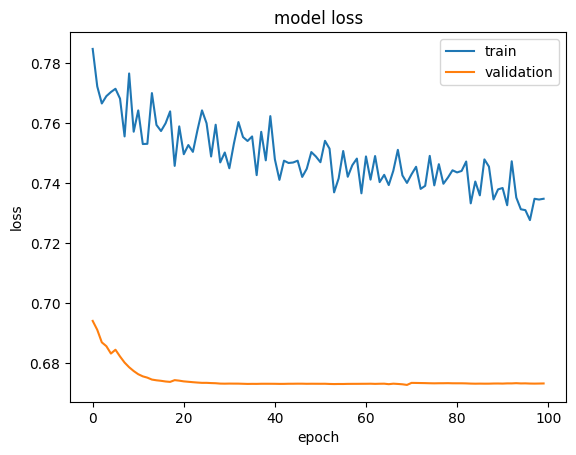

In [38]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [39]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [40]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((4900, 116412), (4900,)), ((2100, 116412), (2100,)))

In [41]:
# defining the model architecture with dropout layer
model=Sequential()

model.add(InputLayer(input_shape=(218*178*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [42]:
# defining the adam optimizer and setting the learning rate as 10^-5 and adding clip value to clip the gradients
adam = Adam(learning_rate=1e-5, clipvalue=1)

In [43]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [44]:
# training the model for 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
39/39 [==============================] - 23s 517ms/step - loss: 0.6995 - accuracy: 0.5051 - val_loss: 0.6842 - val_accuracy: 0.6029
Epoch 2/100
39/39 [==============================] - 18s 459ms/step - loss: 0.6855 - accuracy: 0.5757 - val_loss: 0.6786 - val_accuracy: 0.6024
Epoch 3/100
39/39 [==============================] - 17s 433ms/step - loss: 0.6844 - accuracy: 0.5741 - val_loss: 0.6804 - val_accuracy: 0.6010
Epoch 4/100
39/39 [==============================] - 17s 426ms/step - loss: 0.6833 - accuracy: 0.5737 - val_loss: 0.6780 - val_accuracy: 0.6005
Epoch 5/100
39/39 [==============================] - 17s 449ms/step - loss: 0.6821 - accuracy: 0.5731 - val_loss: 0.6778 - val_accuracy: 0.6005
Epoch 6/100
39/39 [==============================] - 16s 426ms/step - loss: 0.6823 - accuracy: 0.5731 - val_loss: 0.6780 - val_accuracy: 0.6005
Epoch 7/100
39/39 [==============================] - 18s 452ms/step - loss: 0.6821 - accuracy: 0.5731 - val_loss: 0.6768 - val_accuracy:

In [45]:

predictions = (model.predict(X_valid) > 0.5).astype("int32")

66/66 [==============================] - 2s 29ms/step


In [46]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, predictions[:, 0]), '%')

Accuracy on validation set: 0.6004761904761905 %


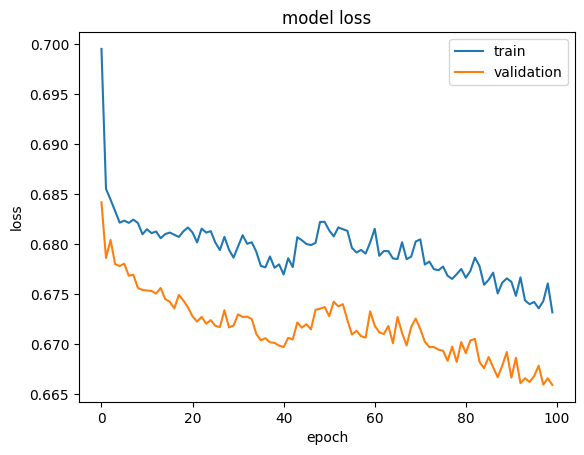

In [47]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [48]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from tensorflow.keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [85]:
!unzip /content/images.zip


Streaming output truncated to the last 5000 lines.
  inflating: images/002001.jpg       
  inflating: images/002002.jpg       
  inflating: images/002003.jpg       
  inflating: images/002004.jpg       
  inflating: images/002005.jpg       
  inflating: images/002006.jpg       
  inflating: images/002007.jpg       
  inflating: images/002008.jpg       
  inflating: images/002009.jpg       
  inflating: images/002010.jpg       
  inflating: images/002011.jpg       
  inflating: images/002012.jpg       
  inflating: images/002013.jpg       
  inflating: images/002014.jpg       
  inflating: images/002015.jpg       
  inflating: images/002016.jpg       
  inflating: images/002017.jpg       
  inflating: images/002018.jpg       
  inflating: images/002019.jpg       
  inflating: images/002020.jpg       
  inflating: images/002021.jpg       
  inflating: images/002022.jpg       
  inflating: images/002023.jpg       
  inflating: images/002024.jpg       
  inflating: images/002025.jpg       

In [50]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [51]:
train.head()

,image_names,class
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,1
3,000004.jpg,0
4,000005.jpg,0


In [52]:
test.head()

,image_names
0,000001.jpg
1,000002.jpg
2,000003.jpg
3,000004.jpg
4,000005.jpg


In [53]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [54]:
# distribution of classes in the dataset
train['class'].value_counts()

class
0    4069
1    2931
Name: count, dtype: int64

In [55]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in train.image_names:
    # loading the image using its name
    img = plt.imread('images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = train['class'].values
#y = data_1.class.values

In [56]:
# shape of the image
X.shape

(7000, 218, 178, 3)

In [58]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 218*178*3)
X.shape

(7000, 116412)

In [59]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

In [60]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [61]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((4900, 116412), (4900,)), ((2100, 116412), (2100,)))

In [62]:
# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(218*178*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               11641300  
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11651501 (44.45 MB)
Trainable params: 11651501 (44.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [64]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [65]:
# training the model for 50 epochs

model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
39/39 [==============================] - 17s 410ms/step - loss: 0.7203 - accuracy: 0.4269 - val_loss: 0.7101 - val_accuracy: 0.3995
Epoch 2/50
39/39 [==============================] - 15s 371ms/step - loss: 0.7032 - accuracy: 0.4269 - val_loss: 0.7026 - val_accuracy: 0.3995
Epoch 3/50
39/39 [==============================] - 16s 395ms/step - loss: 0.6976 - accuracy: 0.4269 - val_loss: 0.6951 - val_accuracy: 0.3990
Epoch 4/50
39/39 [==============================] - 15s 397ms/step - loss: 0.6928 - accuracy: 0.5127 - val_loss: 0.6902 - val_accuracy: 0.6167
Epoch 5/50
39/39 [==============================] - 15s 379ms/step - loss: 0.6924 - accuracy: 0.5384 - val_loss: 0.6910 - val_accuracy: 0.6024
Epoch 6/50
39/39 [==============================] - 16s 424ms/step - loss: 0.6895 - accuracy: 0.5755 - val_loss: 0.6868 - val_accuracy: 0.6005
Epoch 7/50
39/39 [==============================] - 16s 420ms/step - loss: 0.6867 - accuracy: 0.5731 - val_loss: 0.6826 - val_accuracy: 0.6005

In [66]:
predictions = (model.predict(X_valid) > 0.5).astype("int32")

66/66 [==============================] - 4s 52ms/step


In [67]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, predictions[:, 0]), '%')

Accuracy on validation set: 0.6004761904761905 %


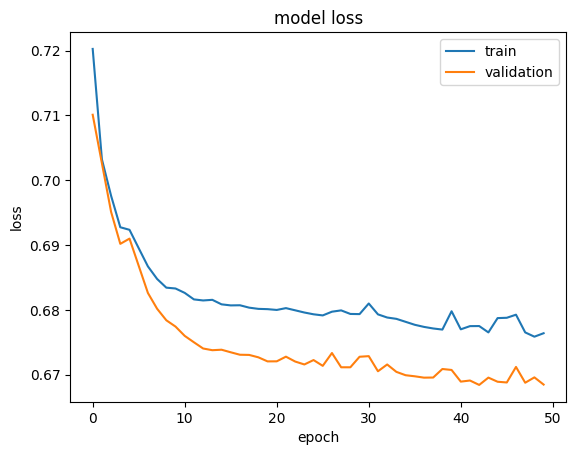

In [68]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [69]:
# importing batch normalization layer
from keras.layers import BatchNormalization

In [73]:
# defining the model architecture and adding batch normalization layers
model=Sequential()

model.add(InputLayer(input_shape=(218*178*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               11641300  
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_20 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11651901 (44.45 MB)
Trainable params: 11651701 (44.45 MB)
Non-trainable params: 200 (800.00 Byte)
_________________________________________________________________


In [78]:
from tensorflow.keras.optimizers import legacy

optimizer = legacy.Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [79]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/50
39/39 [==============================] - 15s 346ms/step - loss: 0.7010 - accuracy: 0.5514 - val_loss: 0.7046 - val_accuracy: 0.3995
Epoch 2/50
39/39 [==============================] - 14s 357ms/step - loss: 0.6781 - accuracy: 0.5812 - val_loss: 0.6946 - val_accuracy: 0.4052
Epoch 3/50
39/39 [==============================] - 14s 361ms/step - loss: 0.6798 - accuracy: 0.5751 - val_loss: 0.6902 - val_accuracy: 0.6038
Epoch 4/50
39/39 [==============================] - 14s 360ms/step - loss: 0.6785 - accuracy: 0.5833 - val_loss: 0.6879 - val_accuracy: 0.6005
Epoch 5/50
39/39 [==============================] - 15s 390ms/step - loss: 0.6785 - accuracy: 0.5816 - val_loss: 0.6810 - val_accuracy: 0.6005
Epoch 6/50
39/39 [==============================] - 14s 351ms/step - loss: 0.6802 - accuracy: 0.5776 - val_loss: 0.6811 - val_accuracy: 0.6005
Epoch 7/50
39/39 [==============================] - 12s 314ms/step - loss: 0.6818 - accuracy: 0.5735 - val_loss: 0.6801 - val_accuracy: 0.6005

In [80]:
predictions = (model.predict(X_valid) > 0.5).astype("int32")

66/66 [==============================] - 2s 33ms/step


In [81]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, predictions[:, 0]), '%')

Accuracy on validation set: 0.6004761904761905 %


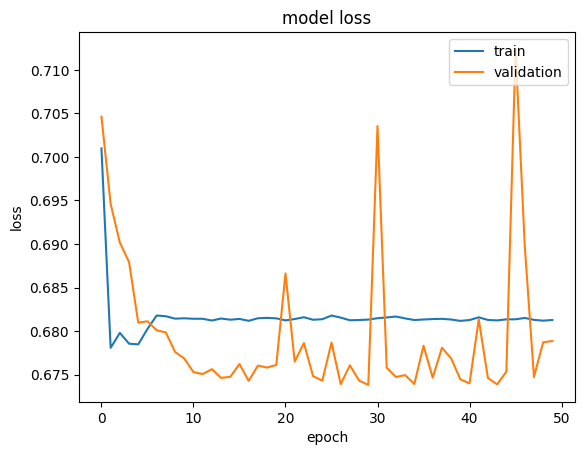

In [82]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [83]:
# importing libraries
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline

Original Image


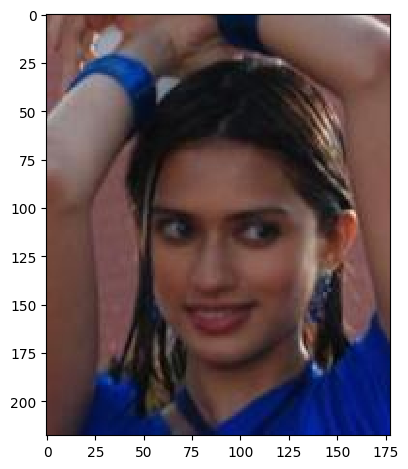

In [87]:
# reading the image
image = imread('/content/images/001000.jpg')
print('Original Image')
#show original image
imshow(image)

Rotated Image


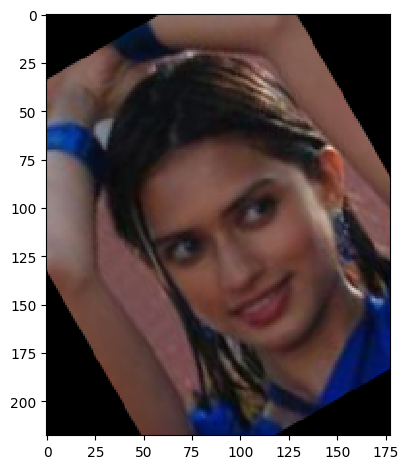

In [88]:
#import required libraries
from skimage.transform import rotate

#rotating the image by 30 degrees
rotated = rotate(image,angle=30)
#plot the rotated image
print('Rotated Image')
imshow(rotated)

Text(0.5, 1.0, 'Original Image')

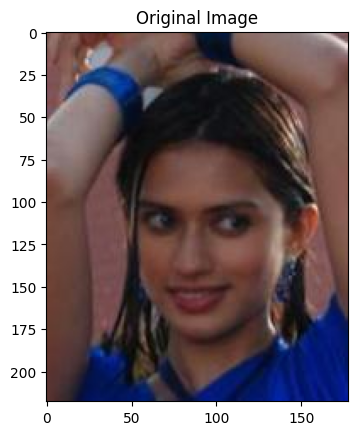

In [90]:
#read the image
image = imread('/content/images/001000.jpg')

plt.imshow(image)
plt.title('Original Image')

Text(0.5, 1.0, 'Normal Shift')

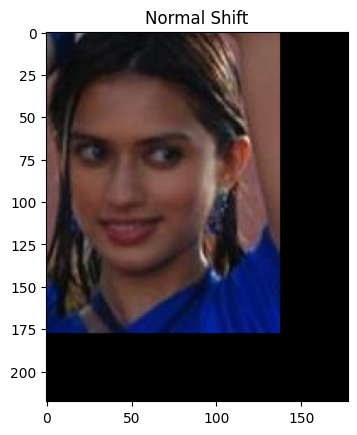

In [91]:
#apply shift operation
from skimage.transform import AffineTransform, warp
transform = AffineTransform(translation=(40,40))
Shift = warp(image,transform)

plt.imshow(Shift)
plt.title('Normal Shift')

Text(0.5, 1.0, 'Wrap Shift')

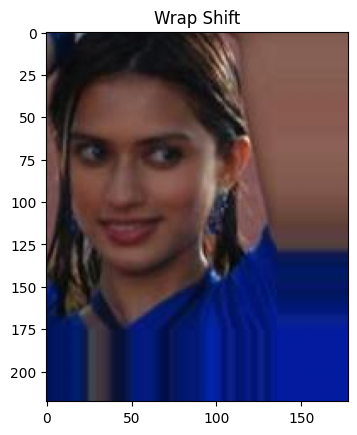

In [92]:
# filling the black portion of image
wrapShift = warp(image,transform,mode='edge')
plt.imshow(wrapShift)
plt.title('Wrap Shift')

Text(0.5, 1.0, 'Original Image')

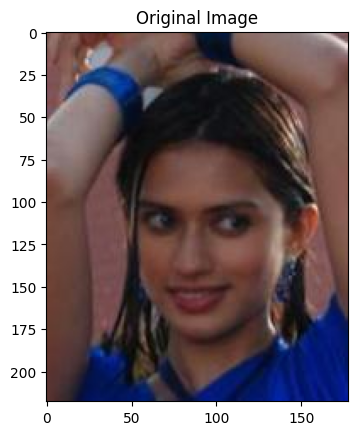

In [93]:
#reading the image
image = imread('/content/images/001000.jpg')

plt.imshow(image)
plt.title('Original Image')

Text(0.5, 1.0, 'Left to Right Flipped')

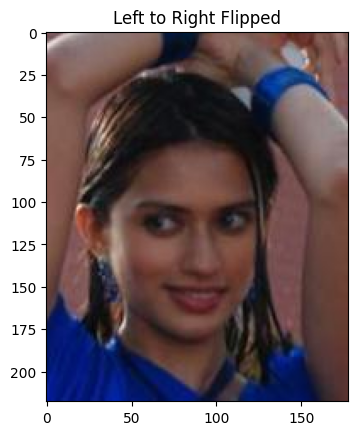

In [94]:
#flip image left-to-right
flipLR = np.fliplr(image)

plt.imshow(flipLR)
plt.title('Left to Right Flipped')

Text(0.5, 1.0, 'Up Down Flipped')

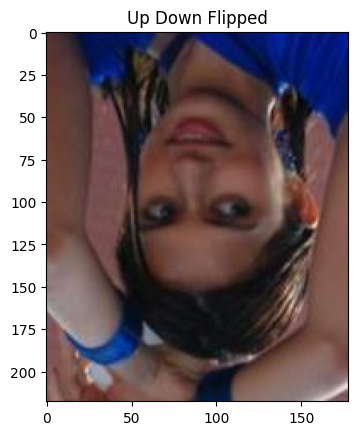

In [95]:
#flip image up-to-down
flipUD = np.flipud(image)

plt.imshow(flipUD)
plt.title('Up Down Flipped')

Text(0.5, 1.0, 'Original Image')

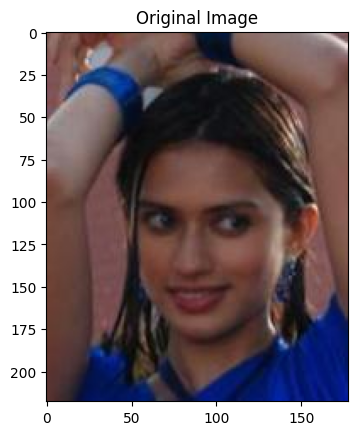

In [96]:
#read the image
image = imread('/content/images/001000.jpg')

plt.imshow(image)
plt.title('Original Image')

Text(0.5, 1.0, 'Random Noise')

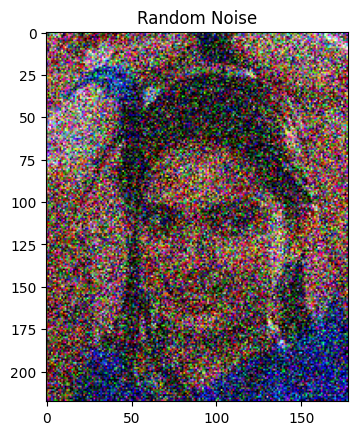

In [97]:
# importing library first
from skimage.util import random_noise
#add random noise to the image
noisyRandom = random_noise(image,var=0.1)

plt.imshow(noisyRandom)
plt.title('Random Noise')

Text(0.5, 1.0, 'Gaussian Noise')

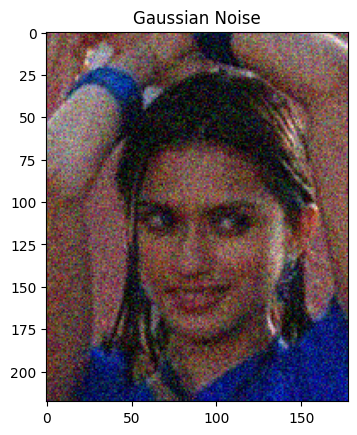

In [98]:
#add gaussian noise to the image
noisyGaussian = random_noise(image,mode='gaussian')

plt.imshow(noisyGaussian)
plt.title('Gaussian Noise')

Text(0.5, 1.0, 'Original Image')

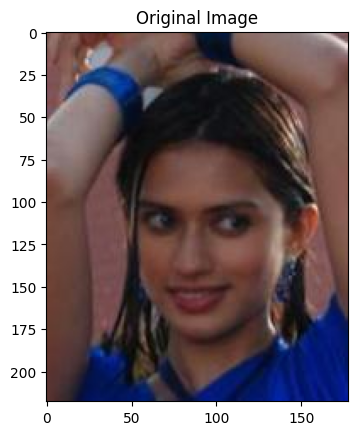

In [100]:
#read the image
image = imread('/content/images/001000.jpg')

plt.imshow(image)
plt.title('Original Image')

<ipython-input-101-b6e3e3ac7a8e>:5: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  blurred = gaussian(image,sigma=2.5,multichannel=True)


Text(0.5, 1.0, 'Blurred Image')

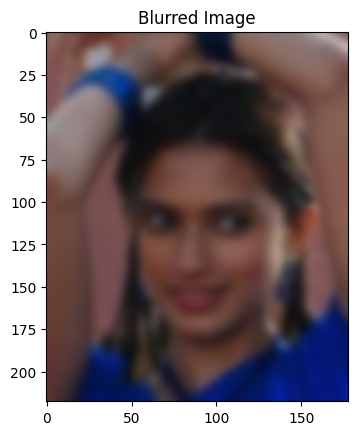

In [101]:
#import required libraries
from skimage.filters import gaussian

#blur the image
blurred = gaussian(image,sigma=2.5,multichannel=True)

plt.imshow(blurred)
plt.title('Blurred Image')